# Lab 1

In [1]:
import numpy as np
import pandas as pd

import ugradio
import ugradio.pico as pico
import ugradio.dft as dft

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

## 5.1: Sample signal
parameters:
    - Voltage Range: 1V
    - N = 1
    - Dual = True
    - Nblocks = 3

In [2]:
imported_data = np.load("data.npz")

In [3]:
sig_a_data = imported_data["arr_0"][0,0, :200]
sig_a_data[:10]

array([ -9216,  11008, -12544,  14080, -15104,  16128, -16640,  17152,
       -17152,  17152], dtype=int16)

In [4]:
sig_b_data = imported_data["arr_0"][1,0,:200]
sig_b_data[:10]

array([ 16640,   3584, -10496, -19200, -19200, -10240,   4096,  16896,
        21248,  14848], dtype=int16)

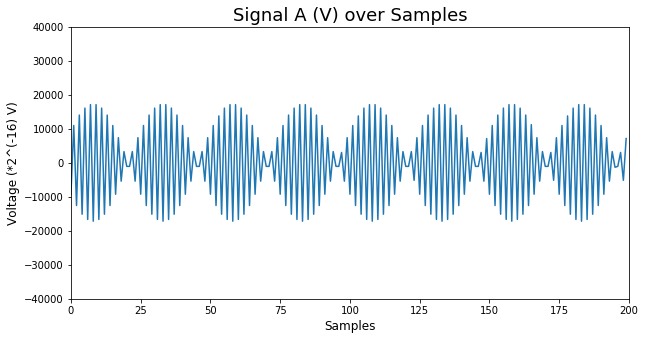

In [5]:
# signal A over samples
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("Voltage (*2^(-16) V)", fontsize=12)
plt.title("Signal A (V) over Samples", fontsize=18)
plt.plot(sig_a_data, linewidth=1.5)

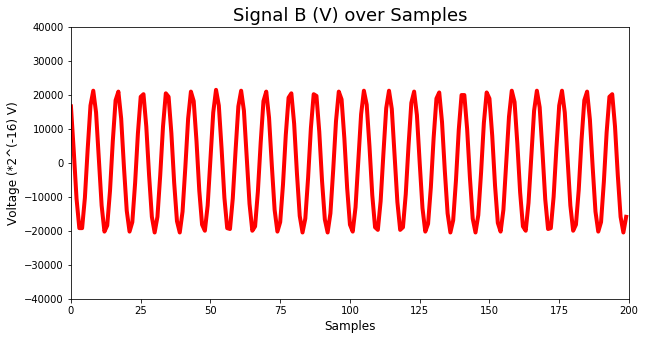

In [6]:
# signal B over samples
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("Voltage (*2^(-16) V)", fontsize=12)
plt.title("Signal B (V) over Samples", fontsize=18)
plt.plot(sig_b_data,  'r', linewidth=4)

# 5.1 

In [7]:
data_length = len(sig_a_data)
N = 1
sampling_frequency_Hz = 62.5e6/N #cool 
delta_t = 1/sampling_frequency_Hz
total_time = delta_t * data_length  

In [8]:
times = np.arange(0, total_time, delta_t)
times[:10]

array([0.00e+00, 1.60e-08, 3.20e-08, 4.80e-08, 6.40e-08, 8.00e-08,
       9.60e-08, 1.12e-07, 1.28e-07, 1.44e-07])

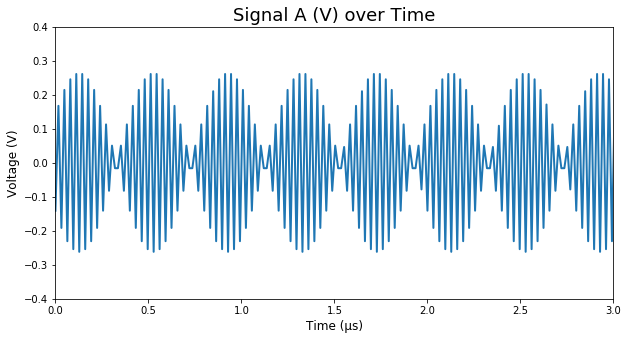

In [9]:
# signal A over time
plt.figure(figsize=(10,5))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
plt.ylim(-.4,.4)
plt.xlabel("Time (μs)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.title("Signal A (V) over Time", fontsize=18)
plt.plot(times*(10**6), sig_a_data/(2**16), linewidth=2)

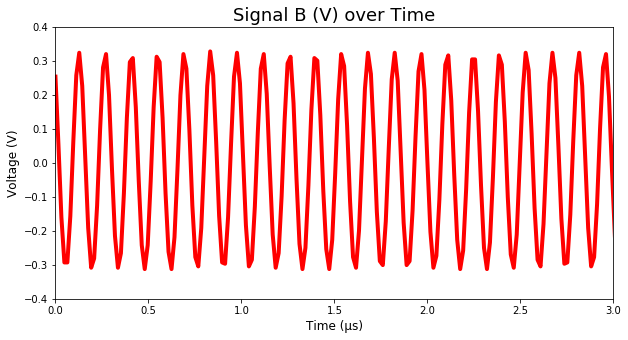

In [10]:
# signal B over time
plt.figure(figsize=(10,5))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
plt.ylim(-.4,.4)
plt.xlabel("Time (μs)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.title("Signal B (V) over Time", fontsize=18)
plt.plot(times*(10**6), sig_b_data/(2**16),  'r', linewidth=4)

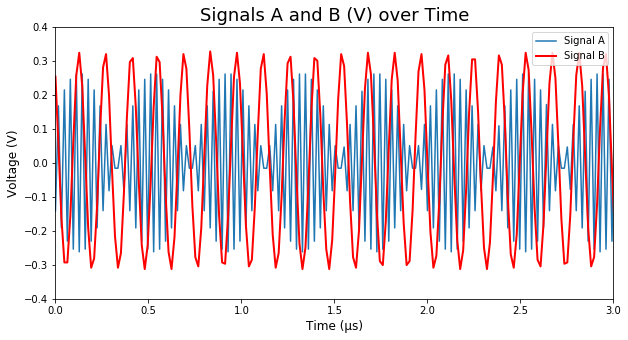

In [11]:
plt.figure(figsize=(10,5))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
plt.ylim(-0.4,0.4)
plt.xlabel("Time (μs)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.title("Signals A and B (V) over Time", fontsize=18)

plt.plot(times*(10**6), sig_a_data/(2**16), label='Signal A', linewidth=1.5)
plt.plot(times*(10**6), sig_b_data/(2**16), 'r', label='Signal B', linewidth=2)
plt.legend(loc='upper right')

# 5.2

In [12]:
# dft.dft
dft_sig_a = dft.dft(sig_a_data, vsamp=62500000)[1]
dft_sig_b = dft.dft(sig_b_data, vsamp=62500000)[1]

ft_time = dft.dft(sig_a_data, vsamp=62500000)[0]
ft_time1= ft_time/10**6 #unit conversion to MHz

# numpy.fft.fft
fft_sig_a = np.fft.fft(sig_a_data)
fft_sig_a = np.fft.fftshift(fft_sig_a)

fft_sig_b = np.fft.fft(sig_b_data)
fft_sig_b = np.fft.fftshift(fft_sig_b)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Signal A Discrete and Fast Fourier Transforms')

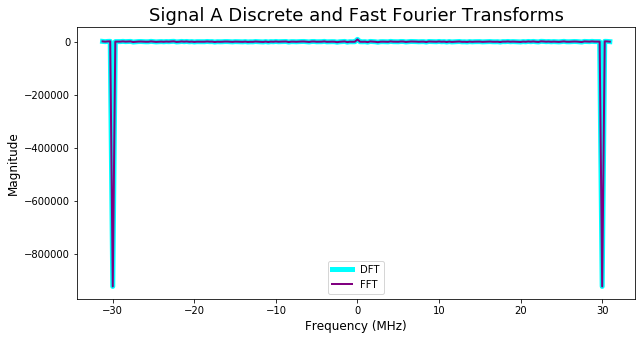

In [13]:
# dft and fft plots for Signal A
plt.figure(figsize=(10,5))
plt.plot(ft_time1, dft_sig_a, 'cyan', linewidth=5.0)
plt.plot(ft_time1, fft_sig_a, 'purple', linewidth=2)
plt.xlabel("Frequency (MHz)", fontsize=12)
plt.ylabel("Magnitude", fontsize=12)
plt.legend(["DFT", "FFT"])
plt.title("Signal A Discrete and Fast Fourier Transforms", fontsize=18)

Text(0.5, 1.0, 'Signal B Discrete and Fast Fourier Transforms')

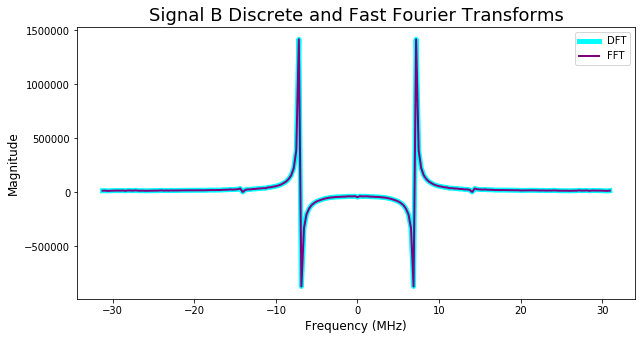

In [14]:
# dft and fft plots for Signal B
plt.figure(figsize=(10,5))
plt.plot(ft_time1, dft_sig_b, 'cyan', linewidth=5.0)
plt.plot(ft_time1, fft_sig_b, 'purple', linewidth=2)
plt.xlabel("Frequency (MHz)", fontsize=12)
plt.ylabel("Magnitude", fontsize=12)
plt.legend(["DFT", "FFT"])
plt.title("Signal B Discrete and Fast Fourier Transforms", fontsize=18)

In [15]:
power_ft_sig_a = [abs(s)**2 for s in fft_sig_a]
power_ft_sig_b = [abs(s)**2 for s in fft_sig_b]

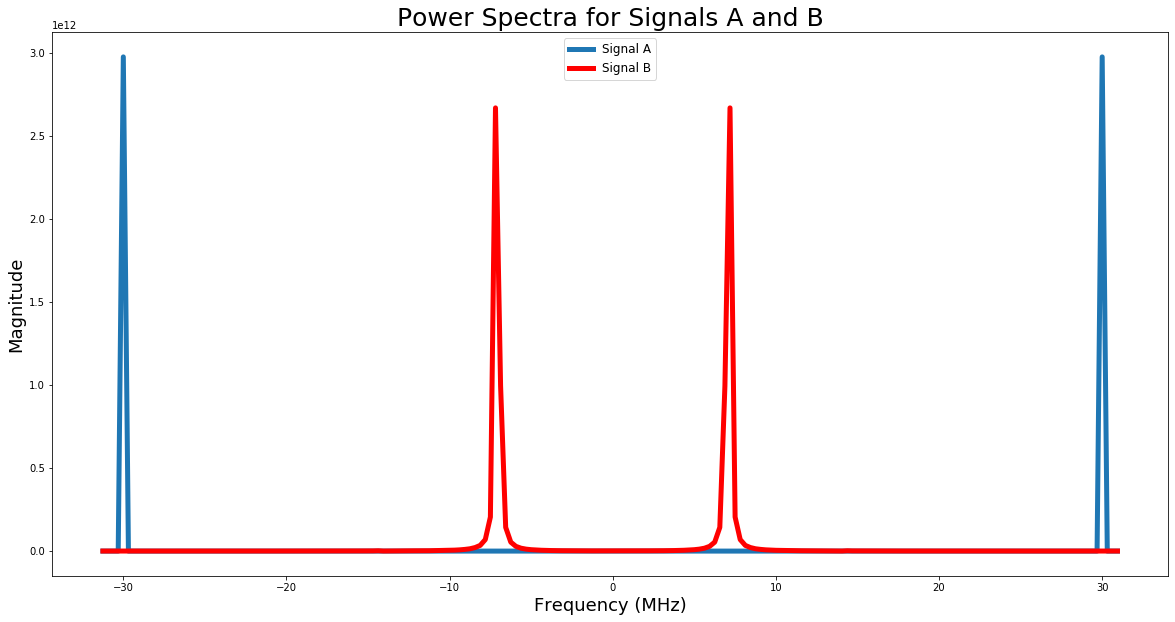

In [16]:
# fft power spectra comparison for signals a and b
plt.figure(figsize=(20,10))
plt.plot(ft_time1, power_ft_sig_a, linewidth=5)
plt.plot(ft_time1, power_ft_sig_b, 'r', linewidth=5)
plt.xlabel("Frequency (MHz)", fontsize=18)
plt.ylabel("Magnitude", fontsize=18)
plt.title("Power Spectra for Signals A and B", fontsize=25)
plt.legend(["Signal A", "Signal B"], fontsize=12)
#plt.xlim(0, 200)
#plt.ylim(-25000,25000)

## Find Signal A Frequency

In [17]:
i = power_ft_sig_a.index(max(power_ft_sig_a))
sig_a_dft_frequency = abs(ft_time1[i])
print("Signal A frequency: " + str(sig_a_dft_frequency) + " MHz")

Signal A frequency: 30.0 MHz


In [18]:
N = 1
f_s = sampling_frequency_Hz/(N*(10**6))
f_max = sig_a_dft_frequency
nyquist_rate_a = 2 * f_max
print("Satisfied Nyquist Criterion: " + str(f_s) + str(' > ') + str(nyquist_rate_a) + " " + str(f_s>nyquist_rate_a))

Satisfied Nyquist Criterion: 62.5 > 60.0 True


## Find Signal B Frequency

In [19]:
i = power_ft_sig_b.index(max(power_ft_sig_b))
sig_b_dft_frequency = abs(ft_time1[i])
print("Signal B frequency: " + str(sig_b_dft_frequency) + " MHz")

Signal B frequency: 7.1875 MHz


In [20]:
N = 1
f_s = sampling_frequency_Hz/(N*(10**6))
f_max = sig_b_dft_frequency
nyquist_rate_b = 2 * f_max
print("Satisfied Nyquist Criterion: " + str(f_s) + str(' > ') + str(nyquist_rate_b) + " " + str(f_s>nyquist_rate_b))

Satisfied Nyquist Criterion: 62.5 > 14.375 True


## Find Minimum Sampling Rates

Signal A frequency at N=2: 2.5 MHz
Signal B frequency at N=2: 14.0625 MHz
Signal A frequency at N=3: 27.5 MHz
Signal B frequency at N=3: 21.25 MHz
Signal A frequency at N=4: 5.0 MHz
Signal B frequency at N=4: 28.125 MHz
Signal A frequency at N=5: 25.0 MHz
Signal B frequency at N=5: 27.1875 MHz
Signal A frequency at N=6: 7.5 MHz
Signal B frequency at N=6: 20.0 MHz
Signal A frequency at N=7: 22.5 MHz
Signal B frequency at N=7: 13.125 MHz
Signal A frequency at N=8: 10.0 MHz
Signal B frequency at N=8: 5.9375 MHz
Signal A frequency at N=9: 20.0 MHz
Signal B frequency at N=9: 1.25 MHz


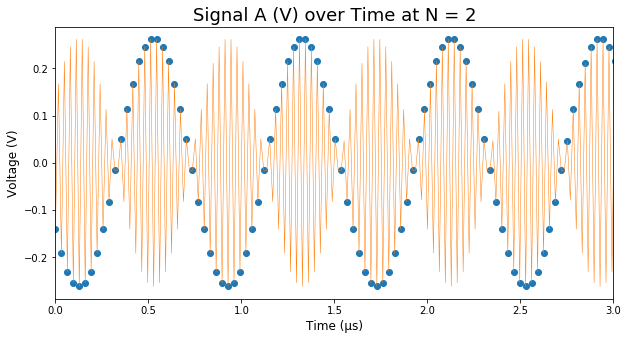

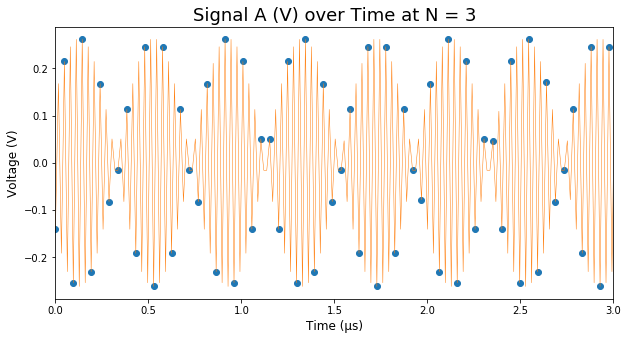

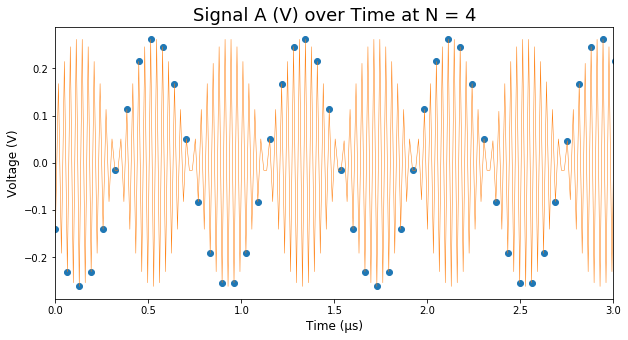

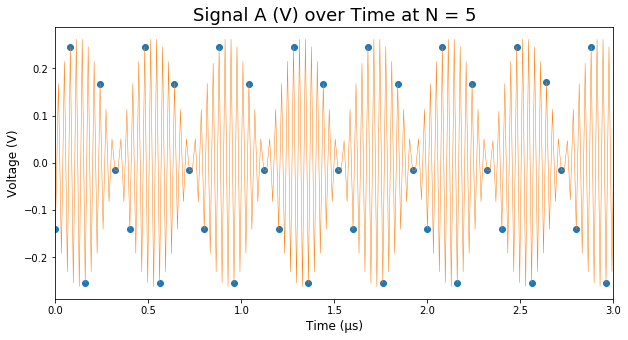

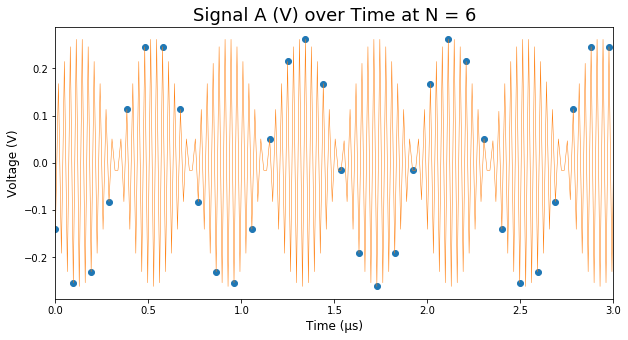

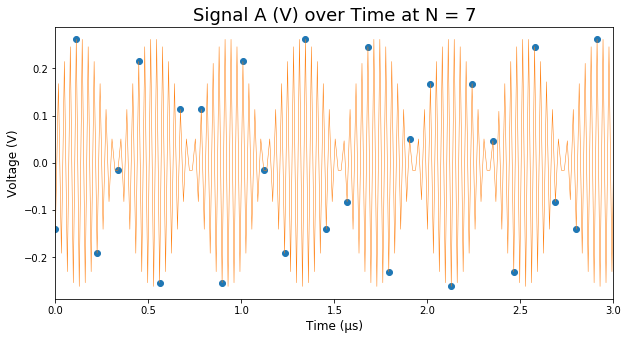

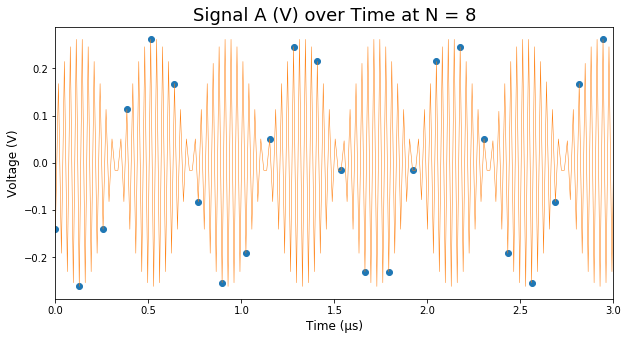

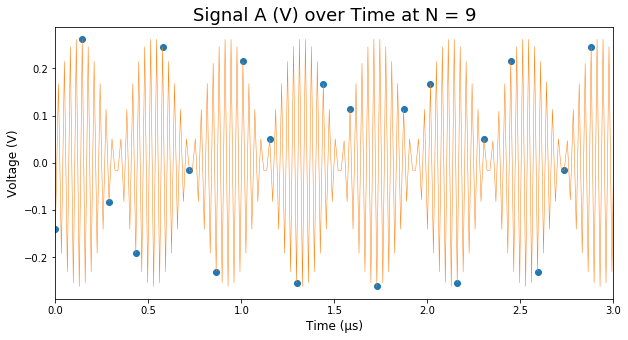

In [21]:
for j in range(2, 10):
    sig_a_data_1 = imported_data["arr_0"][0,0, :200*j]
    sig_b_data_1 = imported_data["arr_0"][1,0, :200*j]
    sig_a_data_2 = sig_a_data_1[::j]
    sig_b_data_2 = sig_b_data_1[::j]
    ft_time_2 = dft.dft(sig_a_data_2, vsamp=62500000/(j))[0]
    ft_time1_2 = ft_time/10**6 #unit conversion to MHz

    # numpy.fft.fft
    fft_sig_a_2 = np.fft.fft(sig_a_data_2)
    fft_sig_a_2 = np.fft.fftshift(fft_sig_a_2)

    fft_sig_b_2 = np.fft.fft(sig_b_data_2)
    fft_sig_b_2 = np.fft.fftshift(fft_sig_b_2)

    power_ft_sig_a_2 = [abs(s)**2 for s in fft_sig_a_2]
    power_ft_sig_b_2 = [abs(s)**2 for s in fft_sig_b_2]

    i = power_ft_sig_a_2.index(max(power_ft_sig_a_2))
    sig_a_dft_frequency_2 = abs(ft_time1_2[i])
    print("Signal A frequency at N=" + str(j) + ": " + str(sig_a_dft_frequency_2) + " MHz")

    i = power_ft_sig_b_2.index(max(power_ft_sig_b_2))
    sig_b_dft_frequency_2 = abs(ft_time1_2[i])
    print("Signal B frequency at N=" + str(j) + ": " + str(sig_b_dft_frequency_2) + " MHz")
    
    data_length = len(sig_a_data_2)
    sampling_frequency_Hz_N = sampling_frequency_Hz/(j) #cool 
    delta_t = 1/sampling_frequency_Hz_N
    total_time = delta_t * data_length  
    times_2 = np.arange(0, total_time, delta_t)

    plt.figure(figsize=(10,5))
    plt.xlim(0, 3)
    plt.xlabel("Time (μs)", fontsize=12)
    plt.ylabel("Voltage (V)", fontsize=12)
    plt.title("Signal A (V) over Time at N = " + str(j), fontsize=18)
    plt.plot(times_2*(10**6), sig_a_data_2/(2**16), "o", linewidth=2)
    plt.plot(times*(10**6), sig_a_data/(2**16), linewidth=.5)

# Compare Time and Frequency Domains

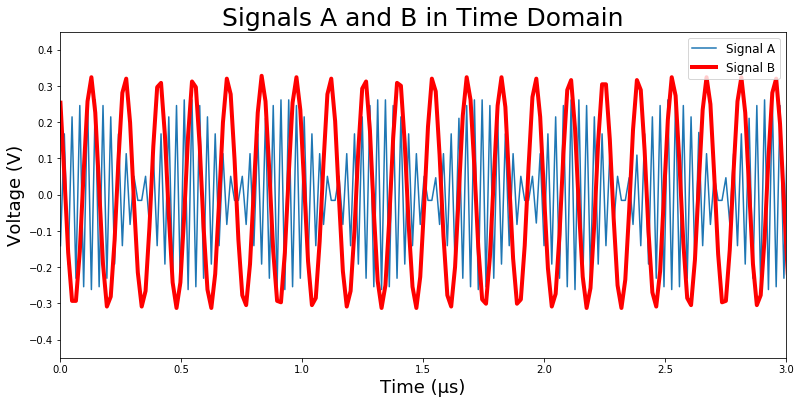

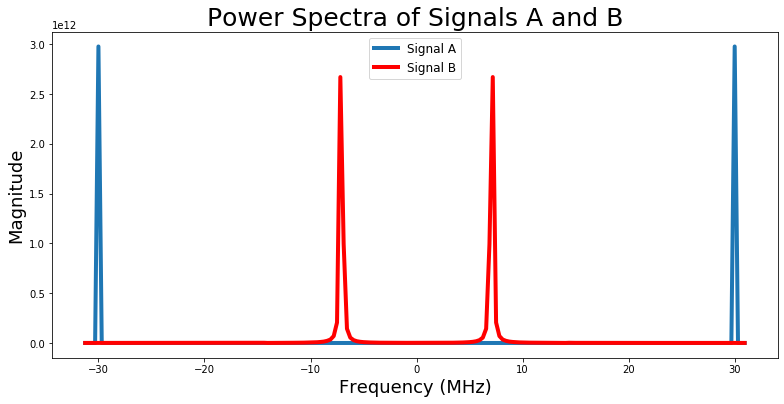

In [22]:
plt.figure(figsize=(13,6))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
plt.ylim(-0.45,0.45)
plt.xlabel("Time (μs)", fontsize=18)
plt.ylabel("Voltage (V)", fontsize=18)
plt.title("Signals A and B in Time Domain", fontsize=25)
plt.plot(times*(10**6), sig_a_data/(2**16), linewidth=1.5)
plt.plot(times*(10**6), sig_b_data/(2**16), 'r', linewidth=4)
plt.legend(["Signal A", "Signal B"], loc='upper right', fontsize=12)

plt.figure(figsize=(13,6))
#plt.xlim(-50,50)
plt.plot(ft_time1, power_ft_sig_a, linewidth=4)
plt.plot(ft_time1, power_ft_sig_b, 'r', linewidth=4)
plt.xlabel("Frequency (MHz)", fontsize=18)
plt.ylabel("Magnitude", fontsize=18)
plt.title("Power Spectra of Signals A and B", fontsize=25)
plt.legend(["Signal A", "Signal B"], fontsize=12)
#plt.xlim(0, 200)
#plt.ylim(-25000,25000)

Text(0.5, 1.0, 'Signal A Real and Imaginary Discrete Fourier Transform')

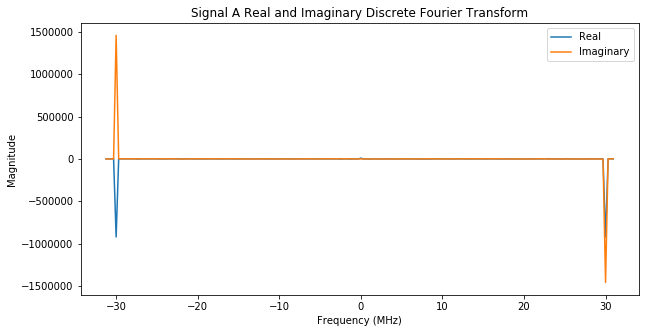

In [23]:
plt.figure(figsize=(10,5))
plt.plot(ft_time1, dft_sig_a.real)
plt.plot(ft_time1, dft_sig_a.imag)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.legend(["Real", "Imaginary"])
plt.title("Signal A Real and Imaginary Discrete Fourier Transform")

Text(0.5, 1.0, 'Signal B Real and Imaginary Discrete Fourier Transform')

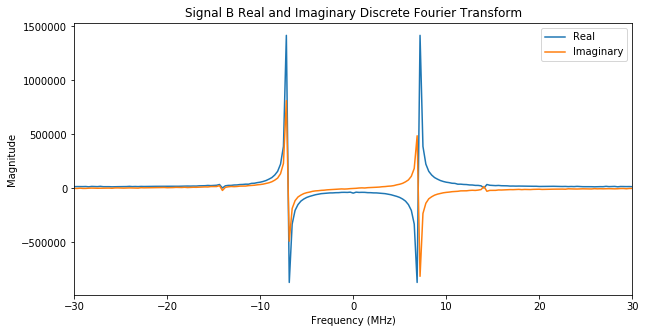

In [24]:
plt.figure(figsize=(10,5))
plt.xlim(-30, 30)
plt.plot(ft_time1, dft_sig_b.real)
plt.plot(ft_time1, dft_sig_b.imag)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.legend(["Real", "Imaginary"])
plt.title("Signal B Real and Imaginary Discrete Fourier Transform")

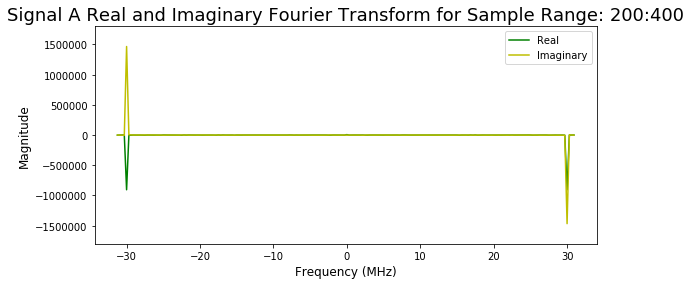

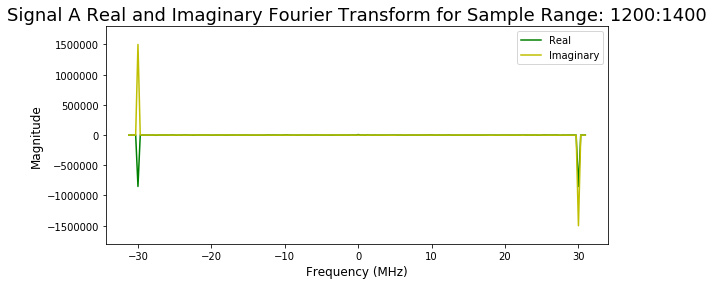

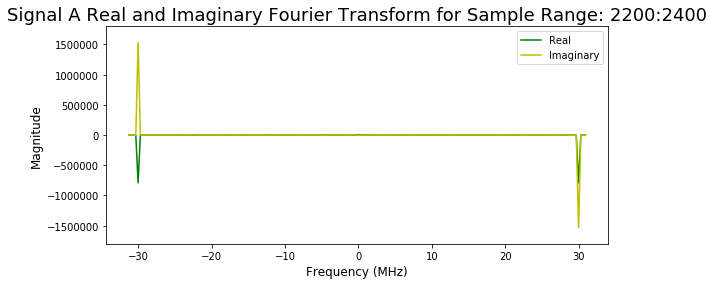

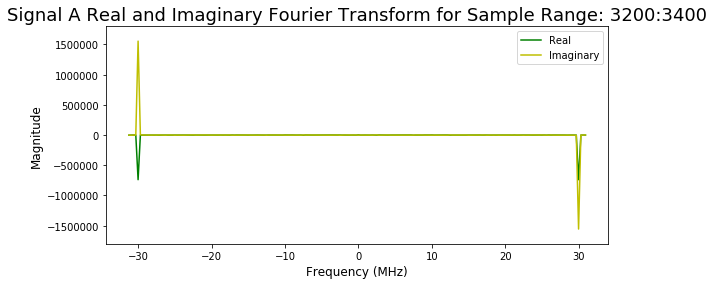

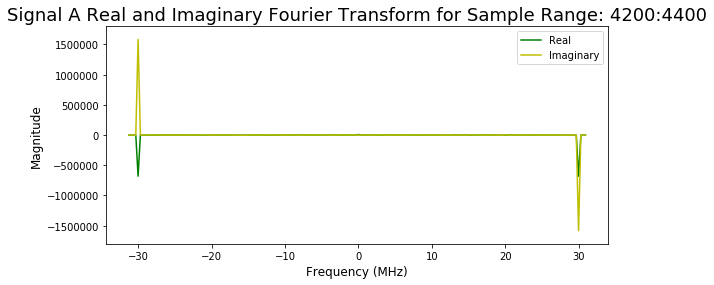

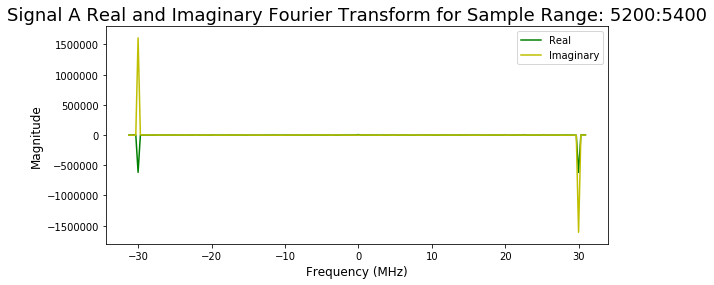

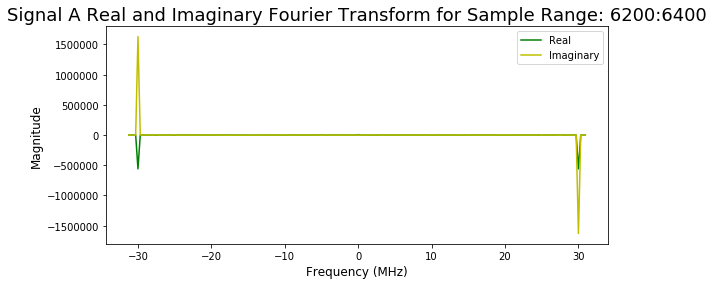

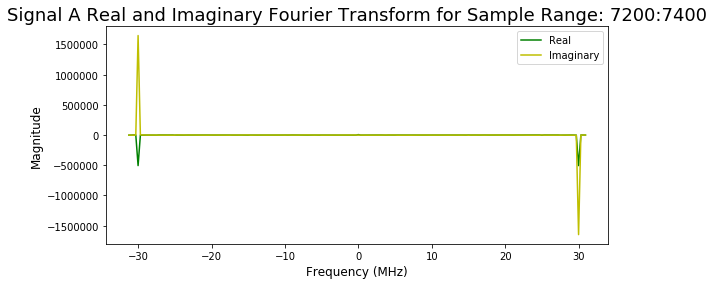

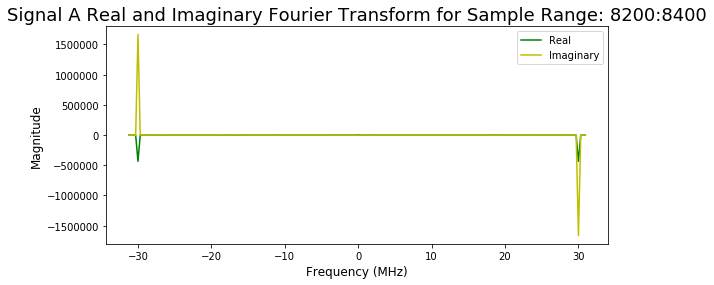

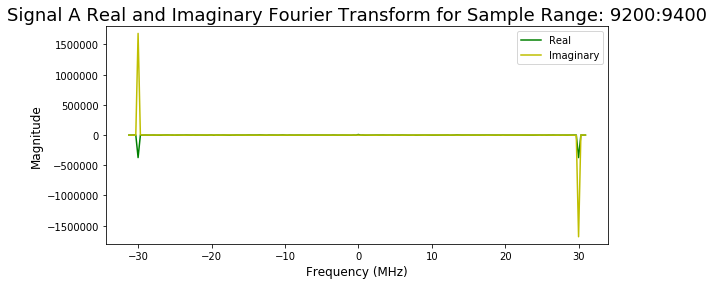

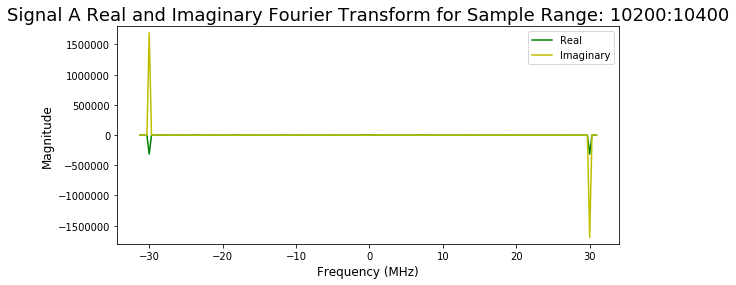

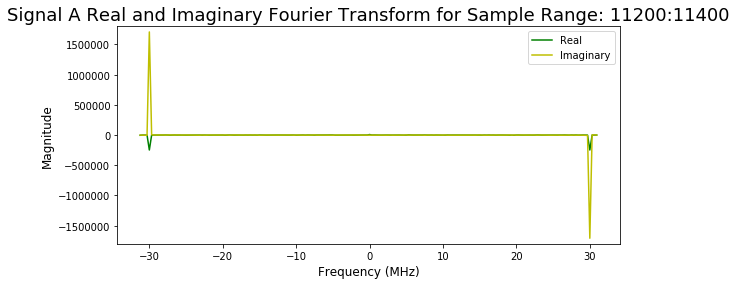

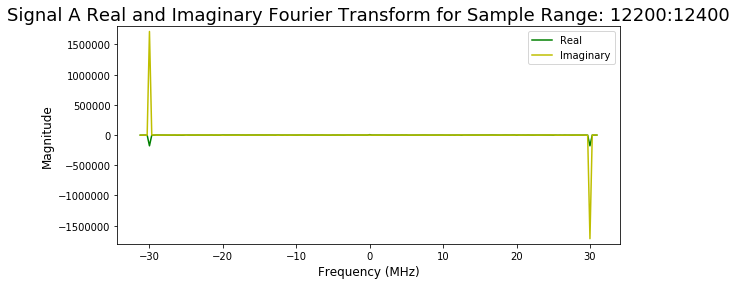

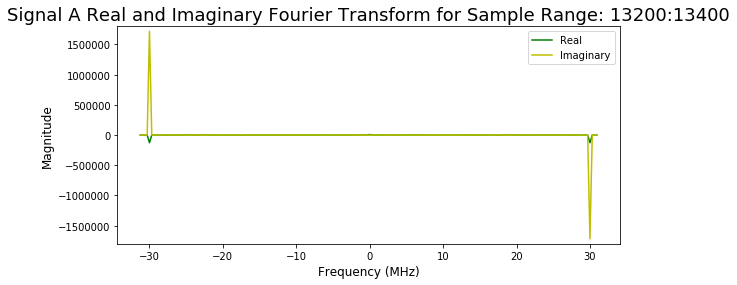

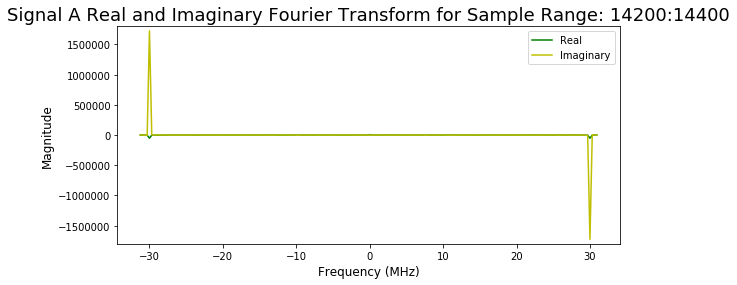

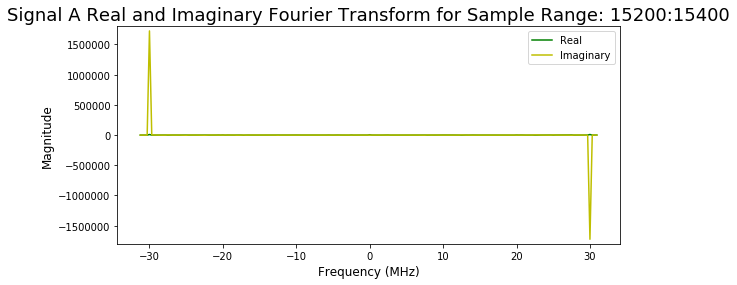

In [25]:
for i in range(200, 16000, 1000):
    sig_a_data_2 = imported_data["arr_0"][0,0, i:i+200]
    dft_sig_a_2 = dft.dft(sig_a_data_2, vsamp=62500000)[1]
    plt.figure(figsize=(9,4))
    #plt.xlim(-30, 30)
    plt.ylim(-1800000, 1800000)
    plt.plot(ft_time1, dft_sig_a_2.real, 'g')
    plt.plot(ft_time1, dft_sig_a_2.imag, 'y')
    plt.xlabel("Frequency (MHz)", fontsize=12)
    plt.ylabel("Magnitude", fontsize=12)
    plt.legend(["Real", "Imaginary"])
    plt.title("Signal A Real and Imaginary Fourier Transform for Sample Range: " + str(i)+ ":"+str(i+200), fontsize=18)

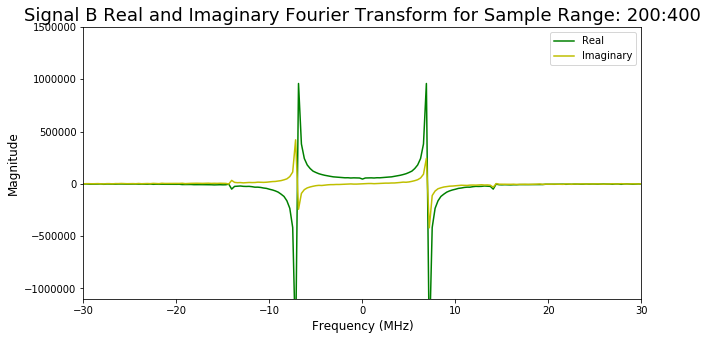

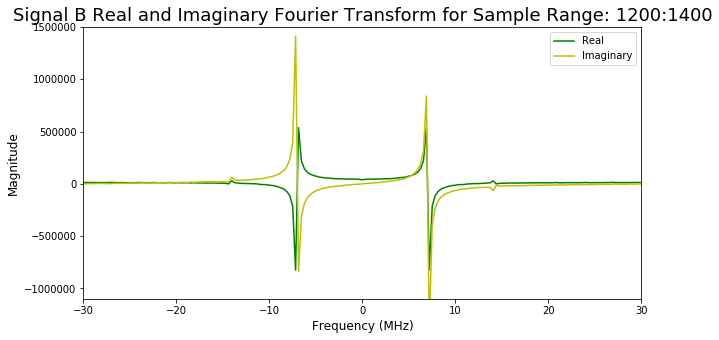

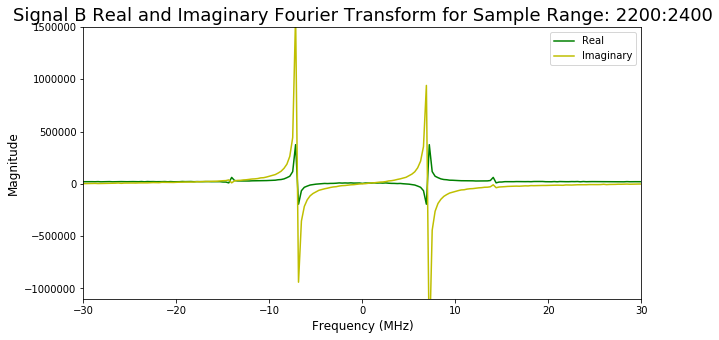

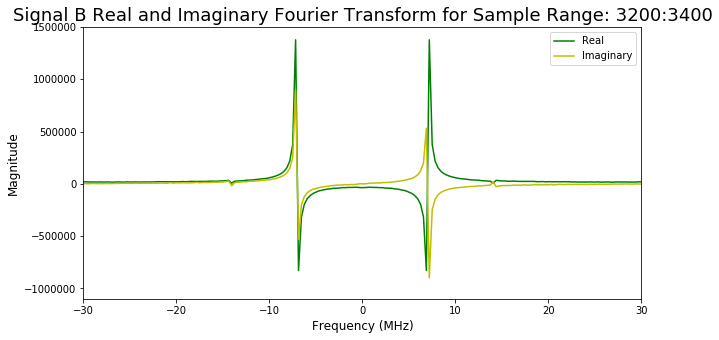

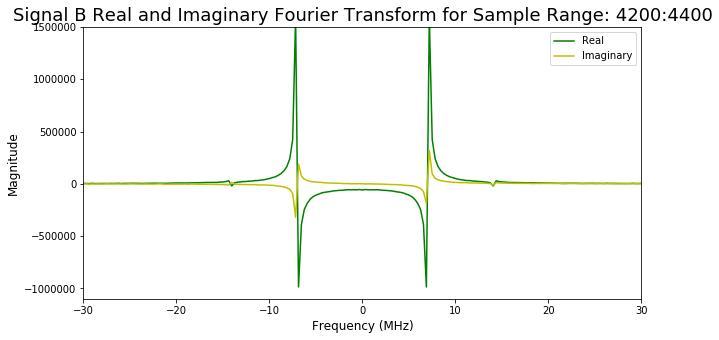

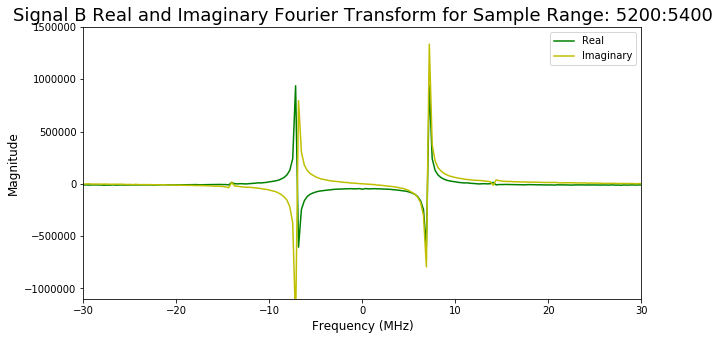

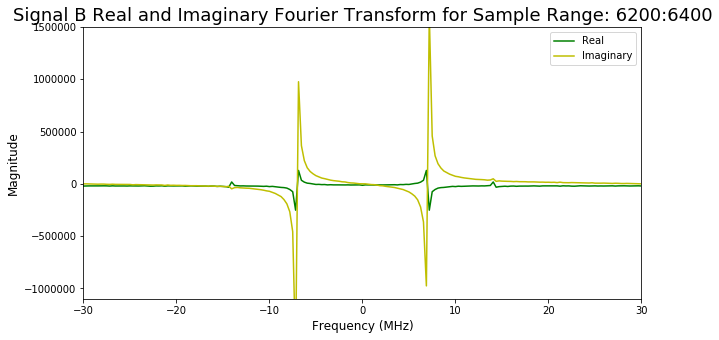

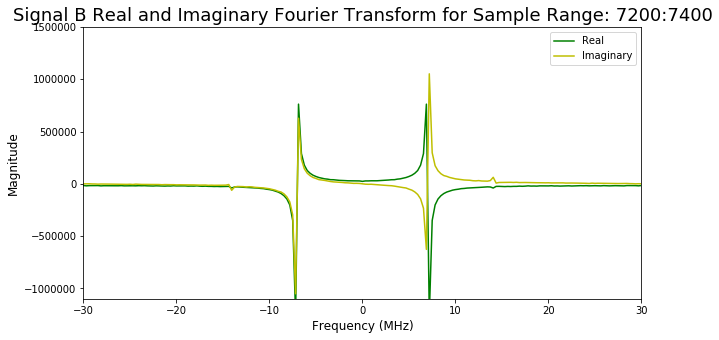

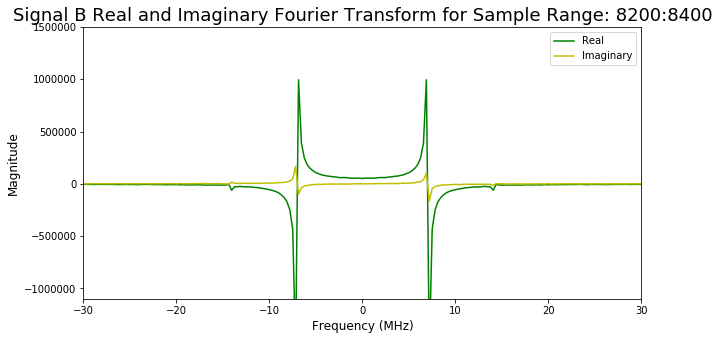

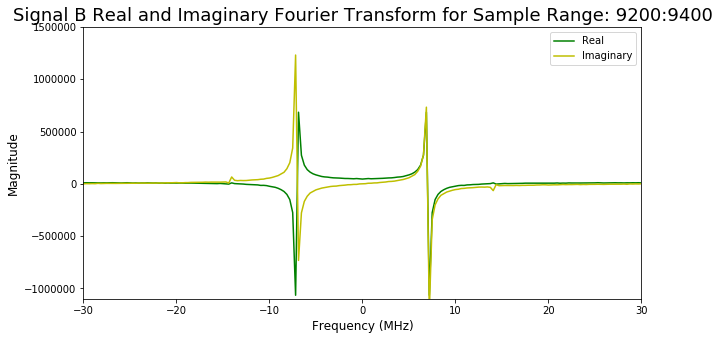

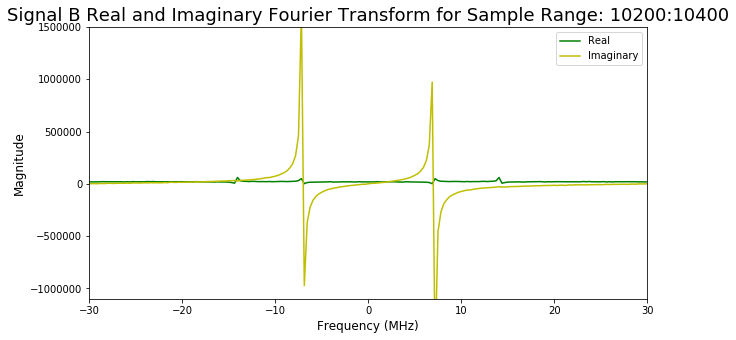

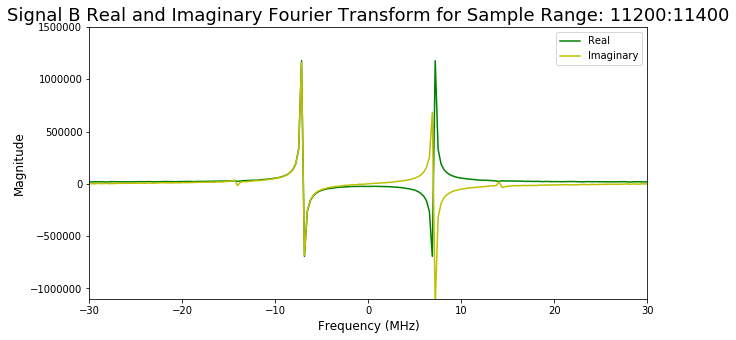

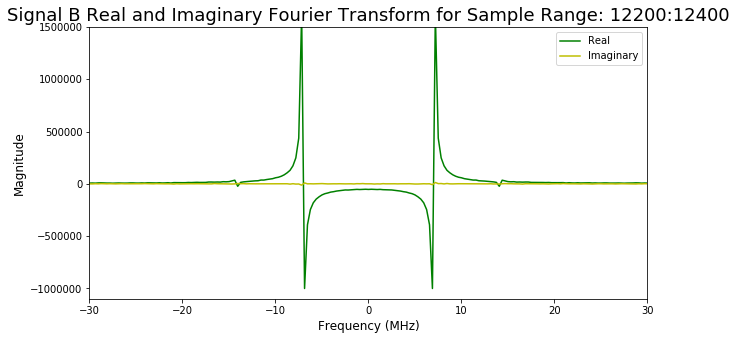

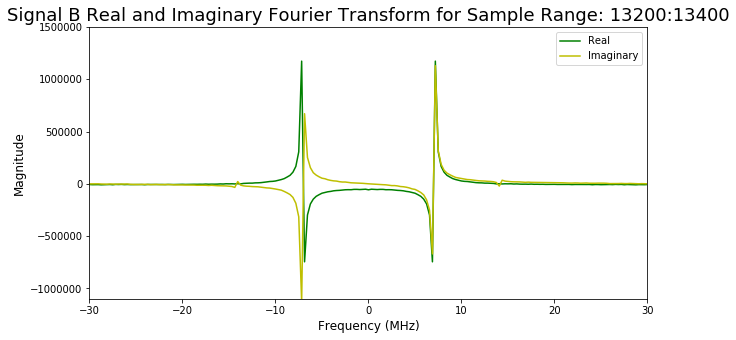

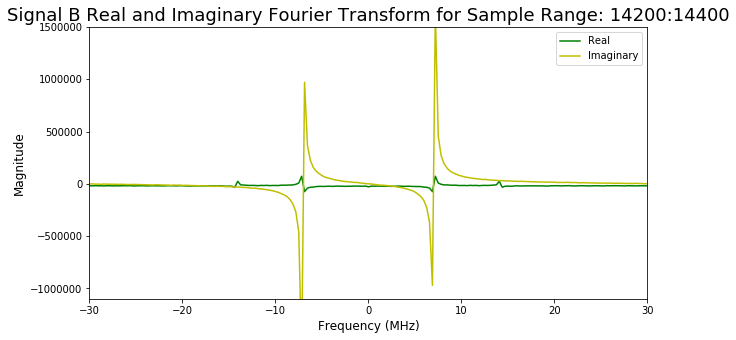

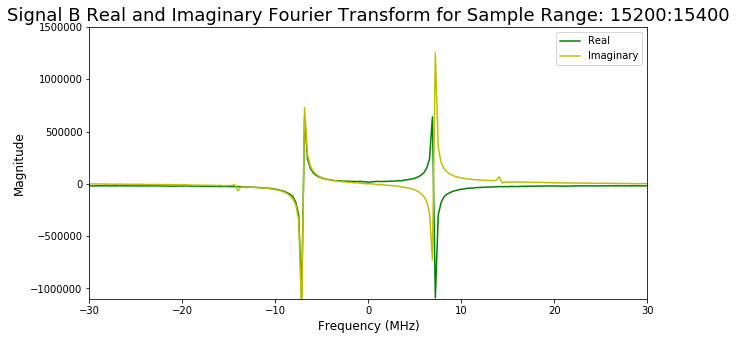

In [26]:
for i in range(200, 16000, 1000):
    sig_b_data_2 = imported_data["arr_0"][1,0, i:i+200]
    dft_sig_b_2 = dft.dft(sig_b_data_2, vsamp=62500000)[1]
    plt.figure(figsize=(10,5))
    plt.xlim(-30, 30)
    plt.ylim(-1100000, 1500000)
    plt.plot(ft_time1, dft_sig_b_2.real, 'g')
    plt.plot(ft_time1, dft_sig_b_2.imag, 'y')
    plt.xlabel("Frequency (MHz)", fontsize=12)
    plt.ylabel("Magnitude", fontsize=12)
    plt.legend(["Real", "Imaginary"])
    plt.title("Signal B Real and Imaginary Fourier Transform for Sample Range: " + str(i)+ ":"+str(i+200), fontsize=18)

## Take inverse Fourier Transform of the Power Spectra 

In [27]:
power_spectra_sig_a = abs((dft_sig_a))**2
power_spectra_sig_b = abs((dft_sig_b))**2
idft_power_spectra_sig_a = dft.idft(power_spectra_sig_a)[1]
idft_power_spectra_sig_b = dft.idft(power_spectra_sig_b)[1]

## Calculate autocorrelation function (ACF)

In [28]:
np.correlate()

TypeError: _correlate_dispatcher() missing 2 required positional arguments: 'a' and 'v'

## Secret Message

In [30]:
imported_secret_message = np.load("secret_message.npz")

In [32]:
imported_secret_message.files

['data', 'fs']

In [34]:
secret_message_data = imported_secret_message['data']